# Demo and Code Walk-Through

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# necessary for RTX GPU due to CuDNN bugs
from camelyon16.training.utils import config_gpu_memory
config_gpu_memory(4096)

## Collect meta information of slides

In [4]:
from camelyon16.preprocessing.slide_utils import get_slides_meta_info

In [5]:
meta_info = get_slides_meta_info(Path("./data/validation/samples/"))

In [6]:
meta_info.head(5)

,id,has_tumor,Level_0,Level_1,Level_2,Level_3,Level_4,Level_5,Level_6,Level_7,Level_8,Level_9
0,test_001,True,"[1.0, (86016, 89600), (86016, 89600)]","[2.0, (43008, 44800), (43008, 44800)]","[4.0, (21504, 22400), (21504, 22400)]","[8.0, (10752, 11200), (10752, 11200)]","[16.0, (5376, 5600), (5376, 5600)]","[32.0, (2688, 2800), (2688, 2800)]","[64.0, (1344, 1400), (1344, 1400)]","[128.0, (672, 700), (672, 700)]","[256.0, (336, 350), []]","[-1, [], []]"
1,test_002,True,"[1.0, (97792, 221184), (97792, 221184)]","[2.0, (48896, 110592), (48896, 110592)]","[4.0, (24448, 55296), (24448, 55296)]","[8.0, (12224, 27648), (12224, 27648)]","[16.0, (6112, 13824), (6112, 13824)]","[32.0, (3056, 6912), (3056, 6912)]","[64.0, (1528, 3456), (1528, 3456)]","[128.0, (764, 1728), (764, 1728)]","[256.0, (382, 864), (382, 864)]","[512.0, (191, 432), []]"
2,test_004,True,"[1.0, (98304, 103936), (98304, 103936)]","[2.0, (49152, 51968), (49152, 51968)]","[4.0, (24576, 25984), (24576, 25984)]","[8.0, (12288, 12992), (12288, 12992)]","[16.0, (6144, 6496), (6144, 6496)]","[32.0, (3072, 3248), (3072, 3248)]","[64.0, (1536, 1624), (1536, 1624)]","[128.0, (768, 812), (768, 812)]","[256.0, (384, 406), (384, 406)]","[-1, [], []]"
3,test_006,False,"[1.0, (97792, 217088), []]","[2.0, (48896, 108544), []]","[4.0, (24448, 54272), []]","[8.0, (12224, 27136), []]","[16.0, (6112, 13568), []]","[32.0, (3056, 6784), []]","[64.0, (1528, 3392), []]","[128.0, (764, 1696), []]","[256.0, (382, 848), []]","[512.0, (191, 424), []]"
4,test_009,False,"[1.0, (97792, 216064), []]","[2.0, (48896, 108032), []]","[4.0, (24448, 54016), []]","[8.0, (12224, 27008), []]","[16.0, (6112, 13504), []]","[32.0, (3056, 6752), []]","[64.0, (1528, 3376), []]","[128.0, (764, 1688), []]","[256.0, (382, 844), []]","[512.0, (191, 422), []]"


The meta info dataframe includes slide level labels and slide shapes for every level.

## Crop patches from the slides

In [7]:
slide_name = "test_016.tif"
level = 5

In [8]:
slide_path = Path(f"./data/validation/samples/{slide_name}")
mask_path = Path(f"./data/validation/samples/{slide_name.replace('.tif', '_mask.tif')}")
save_dir = Path(f"./data/validation/level_{level}/{slide_name}")

In [9]:
from camelyon16.preprocessing.extract_patches import crop_slide_as_patches

In [10]:
info = crop_slide_as_patches(slide_path, mask_path, level, 
                             pos_preserve_weight=1, 
                             save_dir=save_dir, 
                             strategy="neighborhood")

Start cropping slide test_016.tif


In [11]:
label_df = pd.DataFrame(info)
label_df.head(5)

,slide_name,patch_path,row_id,col_id,offset_x,offset_y,has_tumor
0,test_016.tif,data/validation/level_5/test_016.tif/patch_row...,-1,7,-128,896,False
1,test_016.tif,data/validation/level_5/test_016.tif/patch_row...,-1,8,-128,1024,False
2,test_016.tif,data/validation/level_5/test_016.tif/patch_row...,-1,9,-128,1152,False
3,test_016.tif,data/validation/level_5/test_016.tif/patch_row...,-1,10,-128,1280,False
4,test_016.tif,data/validation/level_5/test_016.tif/patch_row...,0,6,0,768,False


So after every extraction, we will get a dataframe containing patch information and corresponding labels, which we will refer to as "*patch_info*" or "*label_info*" in the code.

In [12]:
from camelyon16.preprocessing.extract_patches import get_zoom_out_context

In [13]:
zoom_df = get_zoom_out_context(slide_path, label_df,
                               output_dir= save_dir / "zoom_level_6", 
                               input_level=level, 
                               output_level=6)

Starting cropping zoomed patches for test_016.tif: Base level: 5, Output level: 6.


In [14]:
zoom_df.head()

,slide_name,patch_path,row_id,col_id,offset_x,offset_y,has_tumor
0,test_016.tif,data/validation/level_5/test_016.tif/zoom_leve...,-1,7,-128,896,False
1,test_016.tif,data/validation/level_5/test_016.tif/zoom_leve...,-1,8,-128,1024,False
2,test_016.tif,data/validation/level_5/test_016.tif/zoom_leve...,-1,9,-128,1152,False
3,test_016.tif,data/validation/level_5/test_016.tif/zoom_leve...,-1,10,-128,1280,False
4,test_016.tif,data/validation/level_5/test_016.tif/zoom_leve...,0,6,0,768,False


If we want to do batch processing on a list of slides, we can use the ```crop_all_slides``` and ```zoom_all_slides``` functions from ```camelyon16.preprocessing.extract_patches```, which have multi-processing support.

Now we can also visualize the cropped patches..

In [15]:
from camelyon16.preprocessing.extract_patches import reconstruct_from_patch

Visualizing slide test_016.tif under resize factor 10 ... 


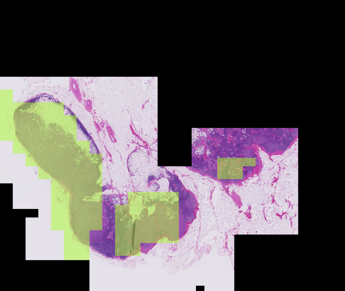

In [16]:
reconstruct_from_patch(meta_info, label_df, level, slide_id=8, resize_factor=10)

Visualizing slide test_016.tif under resize factor 10 ... 


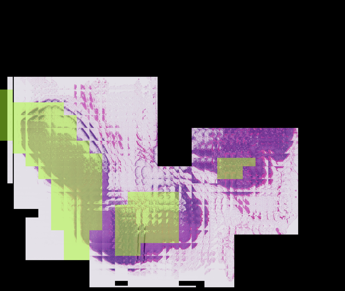

In [17]:
reconstruct_from_patch(meta_info, zoom_df, level, slide_id=8, resize_factor=10)

## Constructing dataset

For this part, I will just use cached label_info on Level-1 for demonstration.

In [18]:
label_info = pd.read_csv("./data/training/level_1/info.csv")
low_res_label_info = pd.read_csv("./data/training//level_1/zoom_level_2/info.csv")

In [19]:
from camelyon16.preprocessing.dataset import get_dataset, show_next_batch

In [20]:
train_ds = get_dataset(label_info, is_training=True, batch_size=32)

Using default sampling strategy, pair two pos patches with one neg patches.
pos patches / neg patches: 1.9968.
total patches count: 154982.
Constructing training dataset with 154982 patches.


In [21]:
show_next_batch(train_ds, return_shape=True)

[TensorShape([32, 299, 299, 3]), TensorShape([32])]

If we specify the label_info dataframe together with the low_res_label_info dataframe, the ```get_dataset``` function will return the multi-input dataset for double tower Inception model, where the input is stacked images for every batch sample.

In [22]:
train_ds_multi = get_dataset(label_info, is_training=True, batch_size=32, low_res_label_df=low_res_label_info)

Using default sampling strategy, pair two pos patches with one neg patches.
pos patches / neg patches: 1.9988.
total patches count: 155087.
Constructing training dataset with 155087 patches.


In [23]:
show_next_batch(train_ds_multi, return_shape=True)

[TensorShape([32, 2, 299, 299, 3]), TensorShape([32])]

## Define models

In [24]:
from camelyon16.training.model import construct_single_resolution_model, construct_multi_resolution_model

In [25]:
import tensorflow as tf

In [26]:
optimizer_template = tf.keras.optimizers.Adam()

In [27]:
single_res = construct_single_resolution_model(optimizer=optimizer_template, freeze_conv_layers=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 22,065,314
Trainable params: 22,030,882
Non-trainable params: 34,432
_________________________________________________________________


In [28]:
multi_res = construct_multi_resolution_model(optimizer=optimizer_template, freeze_conv_layers=False)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2, 299, 299, 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 [(None, 1, 299, 299, 0           input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 299, 299, 3)  0           lambda[0][0]                     
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 299, 299, 3)  0           lambda[0][1]                     
______________________________________________________________________________________________

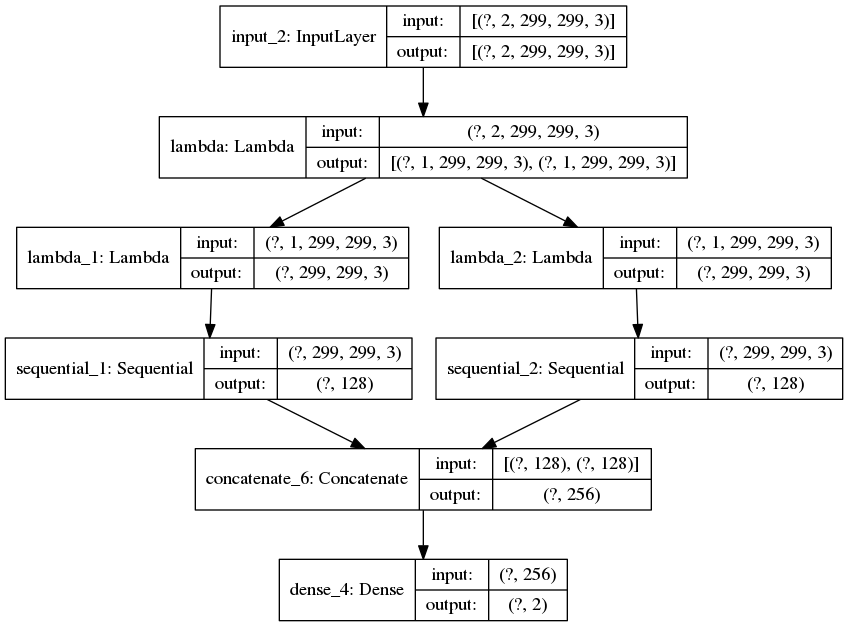

In [29]:
tf.keras.utils.plot_model(multi_res, show_shapes=True, to_file="/tmp/multi_res.png")

We will not demonstrate how to fit a model here, but the whole process of training is shown in the script of ```fit_model.py```.

## Load weights and evaluation

Four pretrained model weights can be downloaded from [here](), where *single_res* refers to the vanilla model based on single resolution input, while *single_res_zoom* and *single_res_neighbor* refer to model trained out Level-2 context input and model trained on patches sampled with neighborhood-aware strategy respectively. The *multi-res* model refers to the multi-resolution model.

In [30]:
weight_path = "./models/single_res.hdf5"
single_res.load_weights(weight_path)

We will now demonstrate how to generate the heatmap with pretrained model.
First we need to generate a dataset for evaluation.

In [31]:
from camelyon16.preprocessing.dataset import get_eval_dataset

In [32]:
# use only one slide for this demo
slide_name = "test_001.tif"

In [33]:
label_info = pd.read_csv("./data/validation/level_1/info.csv")
label_info = label_info[label_info.slide_name == slide_name]
label_info.head()

,slide_name,patch_path,row_id,col_id,offset_x,offset_y,has_tumor
0,test_001.tif,data/validation/samples/../level_1/test_001/pa...,0,20,0,2560,False
1,test_001.tif,data/validation/samples/../level_1/test_001/pa...,0,21,0,2688,False
2,test_001.tif,data/validation/samples/../level_1/test_001/pa...,0,22,0,2816,False
3,test_001.tif,data/validation/samples/../level_1/test_001/pa...,0,23,0,2944,False
4,test_001.tif,data/validation/samples/../level_1/test_001/pa...,0,35,0,4480,False


In [34]:
meta_info = pd.read_json("./data/validation/meta_info.json")

In [35]:
eval_ds = get_eval_dataset(label_info, batch_size=128)

In [36]:
# use the last channel of softmax layer, since we only want P[Y=1|X]
proba = single_res.predict(eval_ds, verbose=1)[:, 1]

564/564 [==============================] - 359s 636ms/step


After getting the probability of each patch, we are now ready to create the heatmap.

In [37]:
from camelyon16.postprocessing.heatmap import generate_heatmap

In [38]:
heatmap, heatmap_grey = generate_heatmap(meta_info_for_slide=meta_info,
                                         patches_info_for_slide=label_info,
                                         input_level=1,
                                         output_level=9,
                                         patch_proba=proba)

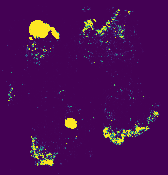

In [39]:
heatmap

Note that we can also set the ```patch_proba``` to be equal to the label of patches, in order to visualize the ground truth mask in an efficient way.

In [40]:
ground_truth, ground_truth_grey = generate_heatmap(meta_info_for_slide=meta_info,
                                                   patches_info_for_slide=label_info,
                                                   input_level=1,
                                                   output_level=9,
                                                   patch_proba=label_info.has_tumor)

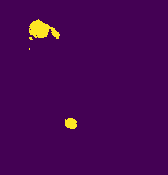

In [41]:
ground_truth

After generating the heatmap, we can further evaluate the model based on slide-level classification using morphology features extracted from heatmap, or based on lesion level localization evaluation using FROC curves. For these evaluation steps, please refer to the ```evaluate_model.py``` script, which includes a detailed process of evaluating models.